In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
train = pd.read_csv('train.csv')

In [2]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#sns.scatterplot(x='SalePrice',y='LotFrontage', data=train)
train[pd.isna(train['GarageYrBlt'])][['GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


In [7]:
calordic = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

In [15]:
train['HeatingQC'] = train['HeatingQC'].map(calordic)

In [2]:
train['LotFrontage'].mean()

NameError: name 'train' is not defined

In [18]:
def inputa_valor(x):
    if pd.isna(x):
        return 70
    else:
        return x

In [20]:
train['LotFrontage'] = train['LotFrontage'].apply(inputa_valor)

In [21]:
train = train[['LotFrontage', 'OverallQual',  'YearBuilt', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'SalePrice']]

In [22]:
train.head()

,LotFrontage,OverallQual,YearBuilt,HeatingQC,1stFlrSF,2ndFlrSF,GarageArea,SalePrice
0,65.0,7,2003,5,856,854,548,208500
1,80.0,6,1976,5,1262,0,460,181500
2,68.0,7,2001,5,920,866,608,223500
3,60.0,7,1915,4,961,756,642,140000
4,84.0,8,2000,5,1145,1053,836,250000


<AxesSubplot:>

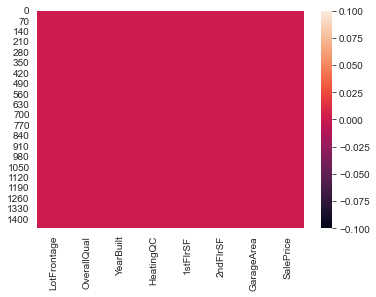

In [23]:
sns.heatmap(pd.isna(train))

In [24]:
x = train[['LotFrontage', 'OverallQual',  'YearBuilt', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GarageArea']]
y = train['SalePrice']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(x_train, y_train)

LinearRegression()

In [29]:
coefs = pd.DataFrame(lm.coef_, x.columns, columns=['Coefs'])
coefs

,Coefs
LotFrontage,208.577455
OverallQual,20537.729981
YearBuilt,331.531211
HeatingQC,5072.468166
1stFlrSF,81.602552
2ndFlrSF,47.444353
GarageArea,43.792532


In [30]:
predict = lm.predict(x_test)

<AxesSubplot:xlabel='SalePrice'>

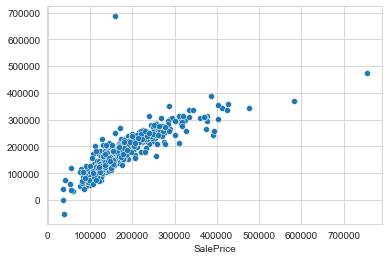

In [31]:
sns.scatterplot(x=y_test, y=predict)

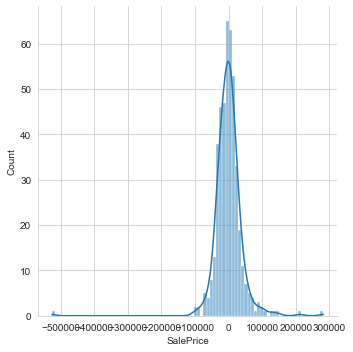

In [32]:
sns.displot((y_test - predict), kde=True)

In [33]:
print('Métrica RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predict)))

Métrica RMSE:  43908.21235276406


In [77]:
test = pd.read_csv('test.csv')

In [78]:
index = test['Id']
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [79]:
test['HeatingQC'] = test['HeatingQC'].map(calordic)

In [80]:
test['LotFrontage'] = test['LotFrontage'].apply(inputa_valor)

In [68]:
def input_garage(x):
    if pd.isna(x):
        return 473
    else:
        return x

In [81]:
test['GarageArea'] = test['GarageArea'].map(input_garage)

In [82]:
test = test[['LotFrontage', 'OverallQual',  'YearBuilt', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GarageArea']]

<AxesSubplot:>

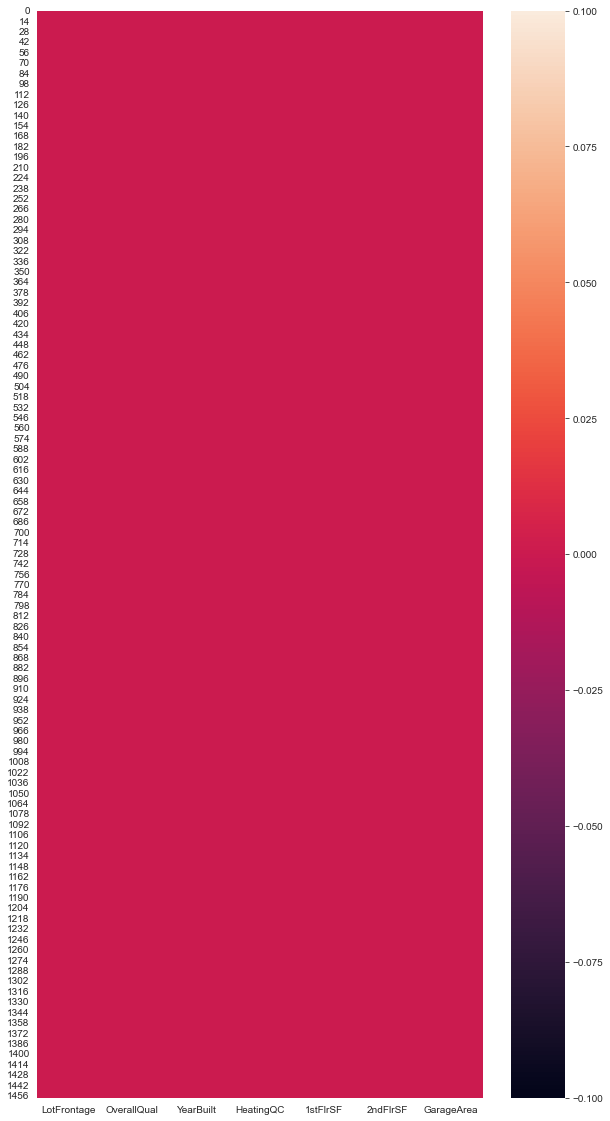

In [83]:
plt.figure(figsize=(10,20))
sns.heatmap(pd.isna(test))

In [87]:
output = pd.Series(lm.predict(test))

In [89]:
resposta = pd.concat([index, output], axis=1)

In [91]:
resposta.rename(columns={0: 'SalePrice'}, inplace=True)

In [93]:
resposta.to_csv('submit1.csv', index=False)